In [1]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv('data-rate10.csv')

In [22]:
memory_list = range(256, 512+1, 64)
cpu_list = range(128, 1024+1, 128)

# wait time - warm
warm_wait_time_list = []
for memory in memory_list:
    warm_wait_time_list.append(list(df[df['memory'] == memory]['waitTime_warm_mean']))

# wait time - cold
cold_wait_time_list = []
for memory in memory_list:
    cold_wait_time_list.append(list(df[df['memory'] == memory]['waitTime_cold_mean']))

# init time - cold
cold_init_time_list = []
for memory in memory_list:
    cold_init_time_list.append(list(df[df['memory'] == memory]['initTime_cold_mean']))

# exec time - warm
warm_exec_time_list = []
for memory in memory_list:
    warm_exec_time_list.append(list(df[df['memory'] == memory]['duration_warm_mean']))

# exec time - cold
cold_exec_time_list = []
for memory in memory_list:
    cold_exec_time_list.append(list(df[df['memory'] == memory]['duration_cold_mean']))

# e2e latency - warm
warm_latency_list = []
for memory in memory_list:
    warm_latency_list.append(list(df[df['memory'] == memory]['latency_warm_mean']))

# e2e latency - cold
cold_latency_list = []
for memory in memory_list:
    cold_latency_list.append(list(df[df['memory'] == memory]['latency_cold_mean']))

actual_invocation_frequency_list = []
for memory in memory_list:
    actual_invocation_frequency_list.append(list(df[df['memory'] == memory]['actual_invocation_rates']))

actual_throughput_list = []
for memory in memory_list:
    actual_throughput_list.append(list(df[df['memory'] == memory]['actual_throughput']))

In [34]:
df

,waitTime_warm_mean,waitTime_warm_std,waitTime_cold_mean,waitTime_cold_std,initTime_cold_mean,initTime_cold_std,duration_warm_mean,duration_warm_std,duration_cold_mean,duration_cold_std,latency_warm_mean,latency_warm_std,latency_cold_mean,latency_cold_std,actual_invocation_rates,actual_throughput,function,memory,cpu,rate
0,750.020000,532.972354,NaN,NaN,NaN,NaN,1034.660000,131.760545,NaN,NaN,1784.680000,520.768210,NaN,NaN,7.715320,6.919458,base64,256,128,10
1,2930.095238,515.630034,1867.875000,409.586704,394.250000,15.727592,1030.642857,101.250190,945.250000,136.920989,3960.738095,504.317363,3207.375000,550.081017,6.716929,5.395489,base64,256,256,10
2,2723.809524,491.993319,1609.125000,290.079022,389.625000,18.399825,1046.214286,132.311999,927.750000,157.066637,3770.023810,467.226194,2926.500000,452.667964,7.097335,5.527916,base64,256,384,10
3,2916.095238,444.171292,1830.500000,308.464863,391.000000,14.402381,1015.404762,110.700003,963.500000,118.848042,3931.500000,410.450452,3185.000000,425.720901,7.151197,5.466273,base64,256,512,10
4,2831.714286,469.765291,1804.375000,306.602552,354.000000,87.663317,1025.357143,116.241091,944.250000,139.916046,3857.071429,445.834181,3102.625000,494.822317,7.095279,5.436555,base64,256,640,10
5,2892.928571,456.675708,1796.500000,270.040209,361.250000,82.184027,1022.880952,116.555274,987.500000,99.749687,3915.809524,422.948491,3145.250000,398.782343,7.057468,5.428882,base64,256,768,10
6,2661.119048,506.738312,1591.250000,321.991903,389.375000,20.304380,1028.119048,136.242109,924.000000,141.689802,3689.238095,482.703454,2904.625000,460.896312,6.669389,5.558026,base64,256,896,10
7,2625.833333,449.597865,1692.750000,345.549149,382.125000,17.049822,992.714286,100.187212,904.000000,170.870043,3618.547619,437.643479,2978.875000,514.517093,6.958250,5.667649,base64,256,1024,10
8,2974.000000,429.082797,1869.833333,176.498631,372.500000,8.826098,771.750000,53.340994,734.166667,122.587792,3745.750000,412.308088,2976.500000,293.229432,7.105568,5.481855,base64,320,128,10
9,2348.954545,445.627801,1234.166667,173.786555,304.000000,107.662435,778.659091,66.241610,769.666667,70.301257,3127.613636,421.968874,2307.833333,265.834848,6.861784,5.830224,base64,320,256,10


In [7]:
import matplotlib.pyplot as plt

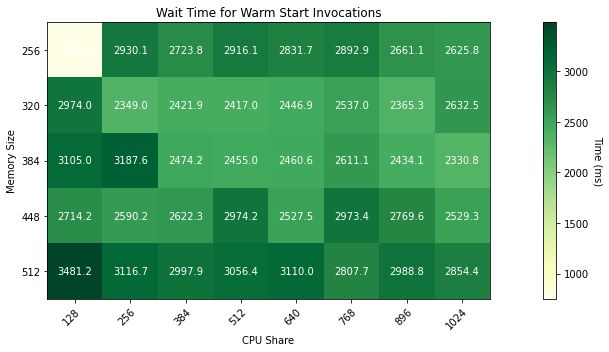

In [30]:
fig, ax = plt.subplots(figsize=(15,5))

# Plot the heatmap
im = ax.imshow(warm_wait_time_list, cmap="YlGn")

# Create colorbar
cbarlabel="Time (ms)"
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(len(cpu_list)))
ax.set_yticks(np.arange(len(memory_list)))
# ... and label them with the respective list entries
ax.set_xticklabels(cpu_list)
ax.set_yticklabels(memory_list)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(memory_list)):
    for j in range(len(cpu_list)):
        text = ax.text(j, i, round(warm_wait_time_list[i][j], 1), ha="center", va="center", color="w")

ax.set_title("Wait Time for Warm Start Invocations")
plt.xlabel('CPU Share')
plt.ylabel('Memory Size')
fig.tight_layout()
plt.show()

In [31]:
def plot_perf(fig_title, data_list):
    fig, ax = plt.subplots(figsize=(15,5))
    
    # Plot the heatmap
    im = ax.imshow(data_list, cmap="YlGn")
    
    # Create colorbar
    cbarlabel="Time (ms)"
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(cpu_list)))
    ax.set_yticks(np.arange(len(memory_list)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(cpu_list)
    ax.set_yticklabels(memory_list)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(memory_list)):
        for j in range(len(cpu_list)):
            text = ax.text(j, i, round(data_list[i][j], 1), ha="center", va="center", color="w")

    ax.set_title(fig_title)
    plt.xlabel('CPU Share')
    plt.ylabel('Memory Size')
    fig.tight_layout()
    plt.show()

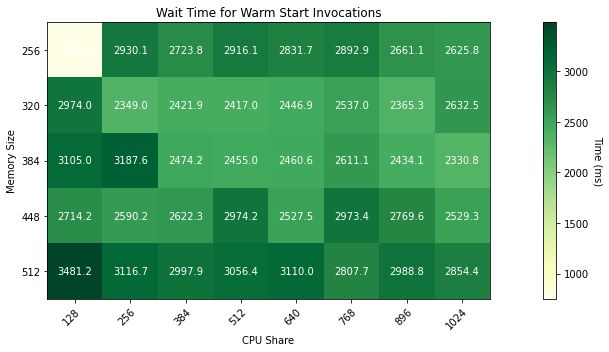

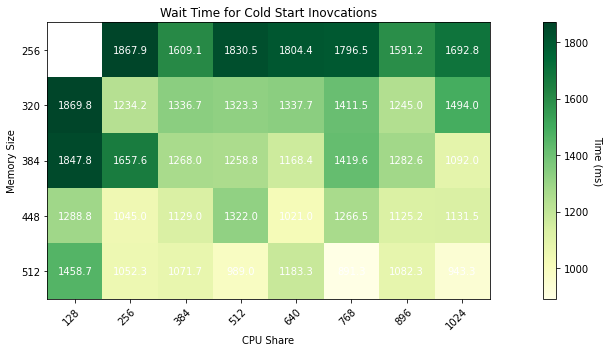

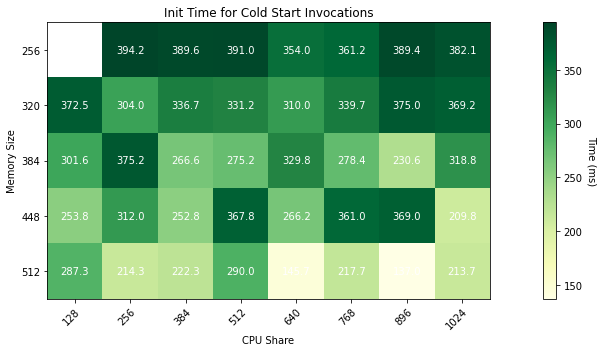

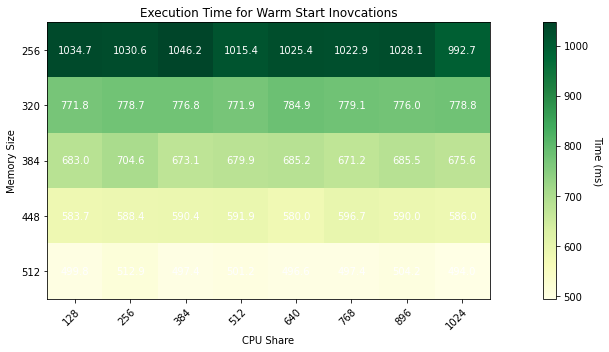

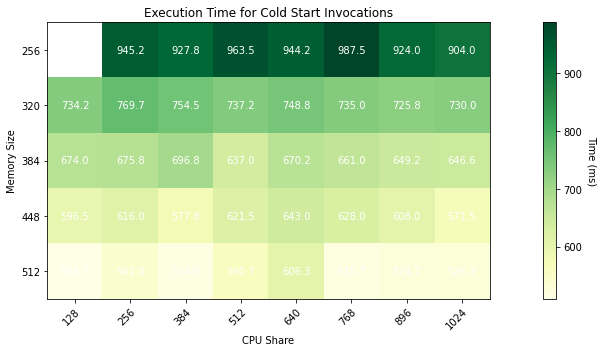

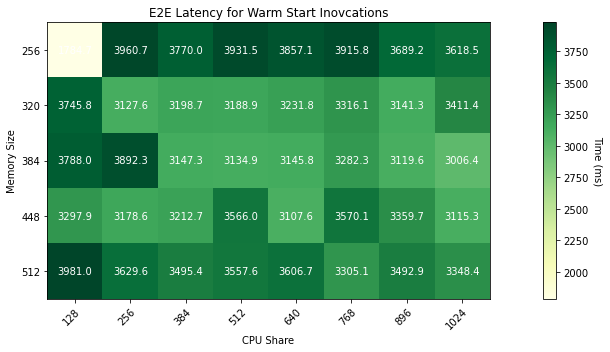

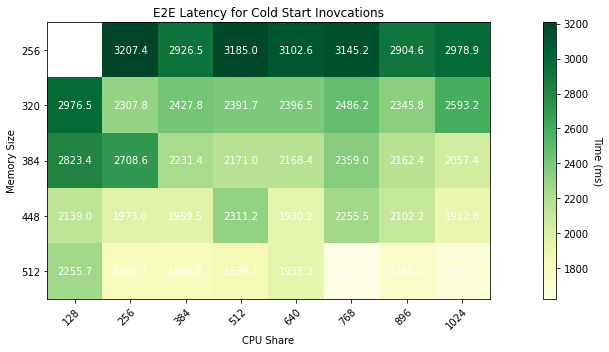

In [32]:
plot_perf('Wait Time for Warm Start Invocations', warm_wait_time_list)
plot_perf('Wait Time for Cold Start Inovcations', cold_wait_time_list)
plot_perf('Init Time for Cold Start Invocations', cold_init_time_list)
plot_perf('Execution Time for Warm Start Inovcations', warm_exec_time_list)
plot_perf('Execution Time for Cold Start Invocations', cold_exec_time_list)
plot_perf('E2E Latency for Warm Start Inovcations', warm_latency_list)
plot_perf('E2E Latency for Cold Start Inovcations', cold_latency_list)